# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
cities = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
City_weather = pd.read_csv(cities)

City_weather.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

print(len(cities))

622


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#URL Path
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key

In [5]:
#Retrieval Order
Retrieval_Record=1

#Lists to hold data
country=[]
city_id=[]
city_name = []
latitude = []
longitude = []
date = []
humidity = []
cloudiness = []
wind_speed = []
max_temperature = []

In [6]:
#Start retrieving data

print(f"In Progress: Data Retrieval")
print(f"____________________________________")

for city in cities:
    try:
        city_data = (requests.get(base_url + '&q=' + city)).json()
        city_name.append(city_data["name"])
        country.append(city_data["sys"]["country"])
        city_id.append(city_data["id"])
        latitude.append(city_data["coord"]["lat"])
        longitude.append(city_data["coord"]["lon"])
        date.append(city_data["dt"])
        humidity.append(city_data["main"]["humidity"])
        cloudiness.append(city_data["clouds"]["all"])
        wind_speed.append(city_data["wind"] ["speed"])
        max_temperature.append(city_data["main"]["temp_max"])
        
        print(f"{Retrieval_Record} of {len(cities)} | City: {city}")
        
        Retrieval_Record=Retrieval_Record+1
        
    except KeyError: 
            print("Error: Skipping City")
    continue
print(f"Data Retrieval Complete")
print(f"______________________________________")

In Progress: Data Retrieval
____________________________________
1 of 622 | City: porbandar
2 of 622 | City: iqaluit
3 of 622 | City: koslan
4 of 622 | City: lebu
5 of 622 | City: nioro
6 of 622 | City: rovaniemi
7 of 622 | City: ushuaia
8 of 622 | City: new norfolk
9 of 622 | City: rio grande
10 of 622 | City: busselton
11 of 622 | City: cape town
12 of 622 | City: pevek
13 of 622 | City: longyearbyen
14 of 622 | City: cascais
15 of 622 | City: rikitea
16 of 622 | City: victoria
17 of 622 | City: ayan
18 of 622 | City: ponta do sol
19 of 622 | City: thompson
20 of 622 | City: rongcheng
21 of 622 | City: borsa
22 of 622 | City: atuona
23 of 622 | City: edd
24 of 622 | City: arman
25 of 622 | City: butaritari
26 of 622 | City: ahipara
27 of 622 | City: hobart
28 of 622 | City: tasiilaq
29 of 622 | City: puerto ayora
30 of 622 | City: padang
31 of 622 | City: isangel
32 of 622 | City: ancud
33 of 622 | City: bethel
34 of 622 | City: mataura
35 of 622 | City: deputatskiy
36 of 622 | City:

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_check_cities = pd.DataFrame({'City': city_name,
                            'Latitude': latitude,
                            'Longitude': longitude,
                            'Max Temperature': max_temperature,
                            'Humidity': humidity,
                            'Cloudiness': cloudiness,
                            'Wind Speed': wind_speed})

#Save and export dataframe as csv
pd.DataFrame.to_csv(weather_check_cities, 'weather_check_cities.csv') 

weather_check_cities.head(10)

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Porbandar,21.6422,69.6093,78.24,65,0,6.24
1,Iqaluit,63.7506,-68.5145,29.70,92,82,5.99
2,Koslan,63.4564,48.8989,27.68,82,95,7.05
3,Lebu,-37.6167,-73.6500,55.67,85,12,8.57
4,Nioro,13.3500,-15.7500,81.18,77,100,4.76
5,Rovaniemi,66.5000,25.7167,26.01,100,90,9.22
6,Ushuaia,-54.8000,-68.3000,35.26,64,75,21.85
7,New Norfolk,-42.7826,147.0587,51.66,60,99,3.00
8,Rio Grande,-32.0350,-52.0986,64.94,62,0,4.12
9,Busselton,-33.6500,115.3333,55.04,82,100,9.91


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.

high_humidity = weather_check_cities["Humidity"].describe(include = "all")

high_humidity.head(10)

count    568.000000
mean      72.126761
std       19.180056
min       10.000000
25%       64.000000
50%       75.500000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

print(f"The max humidity is stated as 100% therefore, we do not need to move forward with this step.")

The max humidity is stated as 100% therefore, we do not need to move forward with this step.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
#The first requirement is to create a series of scatter plots to showcase the following relationships:

#* Temperature (F) vs. Latitude
#* Humidity (%) vs. Latitude
#* Cloudiness (%) vs. Latitude
#* Wind Speed (mph) vs. Latitude

## Latitude vs. Temperature Plot

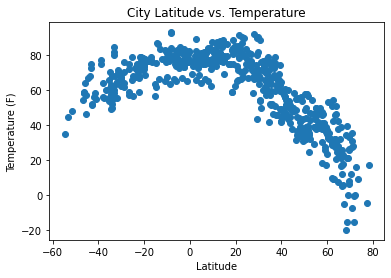

In [11]:
#Scatter plot 1

plt.scatter(weather_check_cities['Latitude'], weather_check_cities['Max Temperature'])
plt.title(f"City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
# plt.grid(True)
plt.savefig('lat_temp.png')

In [12]:
print(f"The above scatter plot indicates that the highest temperatures are typically at a latitude of at/around 20.")

The above scatter plot indicates that the highest temperatures are typically at a latitude of at/around 20.


## Latitude vs. Humidity Plot

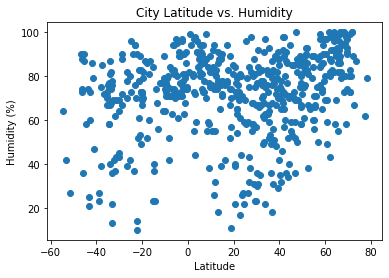

In [13]:
#Scatter plot 2

plt.scatter(weather_check_cities['Latitude'], weather_check_cities['Humidity'])
plt.title(f"City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# plt.grid(True)
plt.savefig('lat_humidity.png')

In [14]:
print(f"The above scatter plots indicates little to no relation between x and y.")

The above scatter plots indicates little to no relation between x and y.


## Latitude vs. Cloudiness Plot

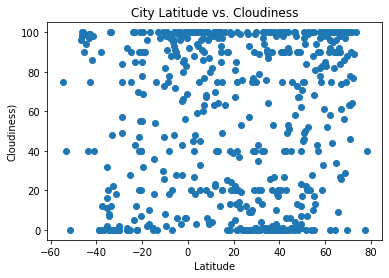

In [15]:
#Scatter plot 3

plt.scatter(weather_check_cities['Latitude'], weather_check_cities['Cloudiness'])
plt.title(f"City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness)")
# plt.grid(True)
plt.savefig('lat_cloudiness.png')

In [16]:
print(f"The above scatter plots indicates little to no relation between x and y.")

The above scatter plots indicates little to no relation between x and y.


## Latitude vs. Wind Speed Plot

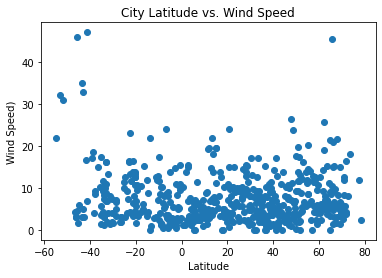

In [17]:
#Scatter plot 4

plt.scatter(weather_check_cities['Latitude'], weather_check_cities['Wind Speed'])
plt.title(f"City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed)")
# plt.grid(True)
plt.savefig('lat_wing_speed.png')

In [18]:
print(f"The above scatter plot indicates a slight positive correlation between x and y however, majority of the scatter plot inidcates low correlation levels.")

The above scatter plot indicates a slight positive correlation between x and y however, majority of the scatter plot inidcates low correlation levels.


## Linear Regression

In [21]:
#Linear Regression Model

#dataframes for northern and southern
northern = weather_check_cities.loc[weather_check_cities['Latitude']>0]
southern = weather_check_cities.loc[weather_check_cities['Latitude']<0]

In [22]:
northern.head(10)

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Porbandar,21.6422,69.6093,78.24,65,0,6.24
1,Iqaluit,63.7506,-68.5145,29.70,92,82,5.99
2,Koslan,63.4564,48.8989,27.68,82,95,7.05
4,Nioro,13.3500,-15.7500,81.18,77,100,4.76
5,Rovaniemi,66.5000,25.7167,26.01,100,90,9.22
11,Pevek,69.7008,170.3133,6.39,93,100,4.03
12,Longyearbyen,78.2186,15.6401,17.44,79,40,2.30
13,Cascais,38.6979,-9.4215,61.50,67,3,5.01
15,Hong Kong,22.2855,114.1577,70.25,73,37,1.99
16,Ayan,56.4500,138.1667,38.77,75,43,2.30


In [23]:
southern.head(10)

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
3,Lebu,-37.6167,-73.6500,55.67,85,12,8.57
6,Ushuaia,-54.8000,-68.3000,35.26,64,75,21.85
7,New Norfolk,-42.7826,147.0587,51.66,60,99,3.00
8,Rio Grande,-32.0350,-52.0986,64.94,62,0,4.12
9,Busselton,-33.6500,115.3333,55.04,82,100,9.91
10,Cape Town,-33.9258,18.4232,59.34,67,0,3.00
14,Rikitea,-23.1203,-134.9692,74.73,76,43,16.53
21,Atuona,-9.8000,-139.0333,77.92,73,2,17.36
25,Ahipara,-35.1667,173.1667,65.98,71,16,3.60
26,Hobart,-42.8794,147.3294,52.02,73,75,5.01


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [28]:
#linear reg 1

x = pd.to_numeric(northern['Latitude'])

y = pd.to_numeric(northern['Max Temperature'])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression= x * slope + intercept

equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.32056171601845723
The chart indicates that in the Northern Hemisphere the temperature get's cool as the lattitude gets higher.


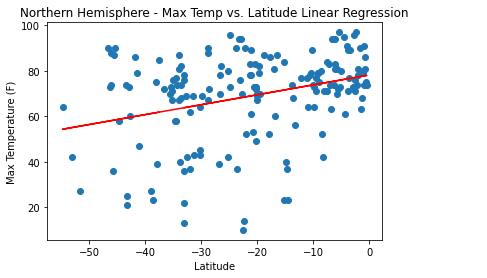

In [54]:
#plot scatter

plt.scatter(x,y)
plt.plot(x,regression, "r-")
plt.annotate(equation,(5,5),fontsize=10,color="brown")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The chart indicates that in the Northern Hemisphere the temperature get's cool as the lattitude gets higher.")
      
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [41]:
#linear reg 2

x = pd.to_numeric(southern['Latitude'])

y = pd.to_numeric(southern['Max Temperature'])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression= x * slope + intercept

equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.32056171601845723
The chart indicates that in the Southern Hemisphere the temperature get's warmer as the lattitude gets higher.


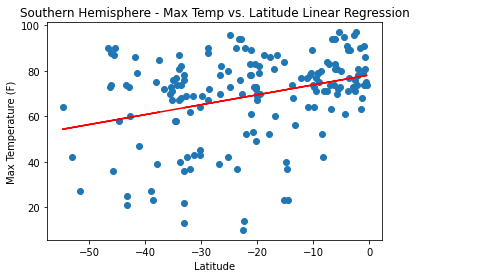

In [53]:
#plot scatter

plt.scatter(x,y)
plt.plot(x,regression, "r-")
plt.annotate(equation,(5,5),fontsize=10,color="brown")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The chart indicates that in the Southern Hemisphere the temperature get's warmer as the lattitude gets higher.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [44]:
#linear reg 3
x = pd.to_numeric(northern['Latitude'])

y = pd.to_numeric(northern['Humidity'])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression= x * slope + intercept

equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.32056171601845723
The chart indicates that in the Northern Hemisphere huidity is pretty inconsistant.


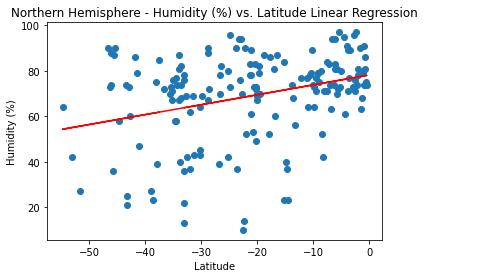

In [52]:
plt.scatter(x,y)
plt.plot(x,regression, "r-")
plt.annotate(equation,(5,5),fontsize=10,color="brown")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The chart indicates that in the Northern Hemisphere huidity is pretty inconsistant.")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [47]:
#linear reg 4
x = pd.to_numeric(southern['Latitude'])

y = pd.to_numeric(southern['Humidity'])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression= x * slope + intercept

equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-squared is: 0.32056171601845723
The chart indicates that in the Southern Hemisphere huidity is pretty consistant.


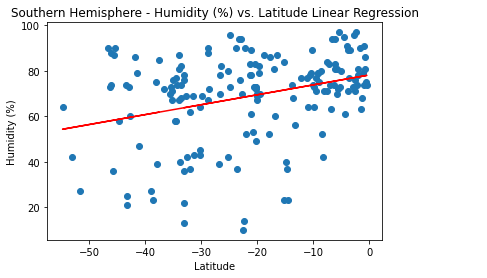

In [51]:
plt.scatter(x,y)
plt.plot(x,regression, "r-")
plt.annotate(equation,(5,5),fontsize=10,color="brown")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The chart indicates that in the Southern Hemisphere huidity is pretty consistant.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.13536933795196518
The chart indicates that in the Southern Hemisphere cloudiness is pretty inconsistant.


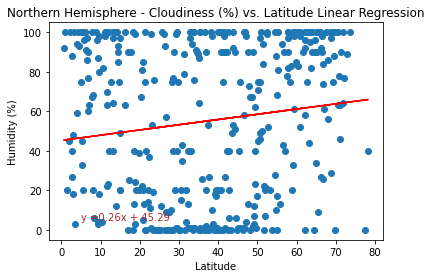

In [56]:
#linear reg 5
x = pd.to_numeric(northern['Latitude'])

y = pd.to_numeric(northern['Cloudiness'])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression= x * slope + intercept

equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regression, "r-")
plt.annotate(equation,(5,5),fontsize=10,color="brown")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The chart indicates that in the Southern Hemisphere cloudiness is pretty inconsistant.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2312306235395808
The chart indicates that in the Southern Hemisphere cloudiness is pretty consistant.


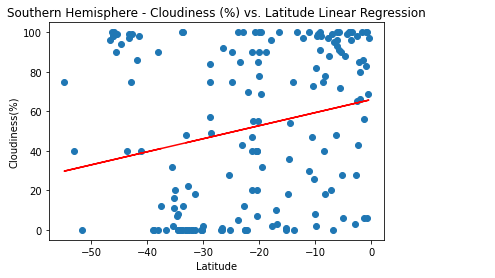

In [58]:
#linear reg 6
x = pd.to_numeric(southern['Latitude'])

y = pd.to_numeric(southern['Cloudiness'])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression= x * slope + intercept

equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regression, "r-")
plt.annotate(equation,(5,5),fontsize=10,color="brown")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The chart indicates that in the Southern Hemisphere cloudiness is pretty consistant.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.14161980910015862
The chart indicates that in the Northern Hemisphere wind speed is pretty consistant.


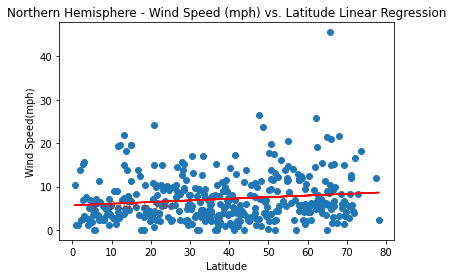

In [62]:
#linear reg 7
x = pd.to_numeric(northern['Latitude'])

y = pd.to_numeric(northern['Wind Speed'])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression= x * slope + intercept

equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regression, "r-")
plt.annotate(equation,(5,5),fontsize=10,color="brown")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The chart indicates that in the Northern Hemisphere wind speed is pretty consistant.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3168181178571201
The chart indicates that in the Southern Hemisphere wind speed is pretty consistant.


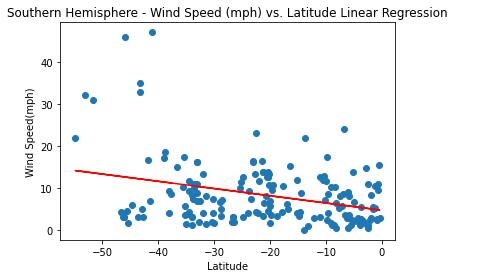

In [64]:
#linear reg 8
x = pd.to_numeric(southern['Latitude'])

y = pd.to_numeric(southern['Wind Speed'])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression= x * slope + intercept

equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regression, "r-")
plt.annotate(equation,(5,5),fontsize=10,color="brown")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The chart indicates that in the Southern Hemisphere wind speed is pretty consistant.")
plt.show()